In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import json
import requests
import pyjsonviewer

from functools import reduce
import operator

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
load_dotenv()

Python-dotenv could not parse statement starting at line 9


True

Using api form LastFm website, to get the most played music genre in the digital platforms.
LastFm gets this info through a feature in their app called scrobbling.

In [2]:
API_KEY = os.getenv("API_key")
USER_AGENT = 'Dataquest'

In [3]:
headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'method': 'chart.gettopartists',
    'format': 'json'
}

r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [4]:
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

In [5]:
r = lastfm_get({
    'method': 'chart.gettopartists'
})

r.status_code

200

In [6]:
def my_json(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

my_json(r.json())

{
    "artists": {
        "@attr": {
            "page": "1",
            "perPage": "50",
            "total": "4346864",
            "totalPages": "86938"
        },
        "artist": [
            {
                "image": [
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "small"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "medium"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "large"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "si

In [7]:
import requests_cache

requests_cache.install_cache()
import time
from IPython.core.display import clear_output

C:\Users\34603\AppData\Local\Temp\ipykernel_7424\3367493050.py:5: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [8]:


responses = []

page = 1
total_pages = 100 # this is just a dummy number so the loop starts

while page <= total_pages:
    payload = {
        'method': 'chart.gettopartists',
        'limit': 500,
        'page': page
    }

    # print some output so we can see the status
    print("Requesting page {}/{}".format(page, total_pages))
    # clear the output to make things neater
    clear_output(wait = True)

    # make the API call
    response = lastfm_get(payload)

    # if we get an error, print the response and halt the loop
    if response.status_code != 200:
        print(response.text)
        break

    # extract pagination info
    page = int(response.json()['artists']['@attr']['page'])
    total_pages = int(response.json()['artists']['@attr']['totalPages'])

    # append response
    responses.append(response)

    # if it's not a cached result, sleep
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)

    # increment the page number
    page += 1

Requesting page 8679/8679


In [9]:
res = responses[0]
res_json = res.json()
res_artists = res_json['artists']['artist']
res_df = pd.DataFrame(res_artists)
res_df.head()

,name,playcount,listeners,mbid,url,streamable,image
0,Taylor Swift,1015796475,3624541,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,The Weeknd,369232855,2901817,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Drake,383946884,4667138,b49b81cc-d5b7-4bdd-aadb-385df8de69a6,https://www.last.fm/music/Drake,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Kanye West,683212522,5738642,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Arctic Monkeys,487532402,4722786,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,https://www.last.fm/music/Arctic+Monkeys,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [10]:
#we got a frame for each page we got from the API call
#now we need to concatenate them
frames = [pd.DataFrame(r.json()['artists']['artist']) for r in responses]
artists = pd.concat(frames)
artists.head()

,name,playcount,listeners,mbid,url,streamable,image
0,Taylor Swift,1015796475,3624541,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,The Weeknd,369232855,2901817,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Drake,383946884,4667138,b49b81cc-d5b7-4bdd-aadb-385df8de69a6,https://www.last.fm/music/Drake,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Kanye West,683212522,5738642,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Arctic Monkeys,487532402,4722786,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,https://www.last.fm/music/Arctic+Monkeys,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [11]:
#dropping irrelevant columns
artists.drop(['mbid', 'url', 'image','streamable'], axis = 1, inplace = True) 


In [12]:
artists.shape

(10000, 3)

In [13]:
#now  we get the genre for each artist we got in last API call 
def lookup_tags(artist):
    response = lastfm_get({
        'method': 'artist.getTopTags',
        'artist':  artist
    })

    # if there's an error, just return nothing
    if response.status_code != 200:
        return None

    # extract the top three tags and turn them into a string
    tags = [t['name'] for t in response.json()['toptags']['tag'][:3]]
    tags_str = ', '.join(tags)

    # rate limiting
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)
    return tags_str

In [14]:
#to monitor the progress
from tqdm import tqdm
tqdm.pandas()

In [15]:
artists['tags'] = artists['name'].progress_apply(lookup_tags)

100%|██████████| 10000/10000 [00:14<00:00, 701.61it/s]


In [16]:
#we save the top  1000 row in the dataframe, otherwose it's going to be too big
artist_df = artists[:1000]

In [85]:
artist_df.head()

,name,playcount,listeners,tags
0,Taylor Swift,1015796475,3624541,"country, pop, female vocalists"
1,The Weeknd,369232855,2901817,"rnb, electronic, dubstep"
2,Drake,383946884,4667138,"Hip-Hop, rap, rnb"
3,Kanye West,683212522,5738642,"Hip-Hop, rap, hip hop"
4,Arctic Monkeys,487532402,4722786,"indie rock, indie, british"


In [116]:
artisr_df.to_csv("./Data/artist_df.csv", index = False)

NameError: name 'artisr_df' is not defined

In [118]:
artist_df = pd.read_csv('./Data/artist_df.csv') 


In [119]:
# Get unique rows in the tags column
new_list = []
for element in artist_df.tags.unique():
    new_list.append(element.split(","))
    
# Flatten the list os lists & make it unique
new_flattened_list = [x.strip().lower().replace(" ", "-") for i in new_list for x in i]
len(new_flattened_list)

2226

In [120]:
new_flattened_list

['country',
 'pop',
 'female-vocalists',
 'rnb',
 'electronic',
 'dubstep',
 'hip-hop',
 'rap',
 'rnb',
 'hip-hop',
 'rap',
 'hip-hop',
 'indie-rock',
 'indie',
 'british',
 'pop',
 'rnb',
 'female-vocalists',
 'hip-hop',
 'rap',
 'seen-live',
 'female-vocalists',
 'indie',
 'indie-pop',
 'hip-hop',
 'rap',
 'ofwgkta',
 'pop',
 'indie-pop',
 'indie',
 'pop',
 'rock',
 'pop-rock',
 'rnb',
 'soul',
 'hip-hop',
 'lo-fi',
 'rnb',
 'hip-hop',
 'jazz',
 'free-jazz',
 'saxophone',
 'rock',
 'alternative',
 'britpop',
 'pop',
 'rnb',
 'rap',
 'alternative',
 'alternative-rock',
 'rock',
 'alternative',
 'electronic',
 'hip-hop',
 'pop',
 'dance',
 'electronic',
 'indie',
 'indie-rock',
 'indie-pop',
 'psychedelic-rock',
 'psychedelic',
 'indie-rock',
 'hip-hop',
 'rap',
 'trap',
 'rnb',
 'pop',
 'female-vocalists',
 'rap',
 'hip-hop',
 'eminem',
 'pop',
 'rnb',
 'male-vocalists',
 'soul',
 'rnb',
 'electronic',
 'pop',
 'female-vocalists',
 'pop-rock',
 'grunge',
 'rock',
 'alternative',
 'cla

In [121]:
freq = {} # stores the frequency of elements
counting = [freq.update({x: new_flattened_list.count(x)}) for x in new_flattened_list]
sort_by_value = dict(sorted(freq.items(), key=lambda item: item[1]))
sort_by_value

{'ofwgkta': 1,
 'free-jazz': 1,
 'eminem': 1,
 'justin-bieber': 1,
 'alternative-rap': 1,
 'one-direction': 1,
 'flamenco': 1,
 'chris-brown': 1,
 'deathcore': 1,
 'doom-metal': 1,
 'italian': 1,
 'slowcore': 1,
 'space-rock': 1,
 'rock-n-roll': 1,
 'cuba': 1,
 'glitch-hop': 1,
 'tiktok': 1,
 'surf': 1,
 'folk-rock': 1,
 'producer': 1,
 'sad': 1,
 'stayc': 1,
 'stoner-rock': 1,
 'shit': 1,
 'psychedelic-folk': 1,
 'german': 1,
 'rapcore': 1,
 'experimental-rap': 1,
 'gothic-rock': 1,
 'industrial-rock': 1,
 'migos': 1,
 'exo': 1,
 'new-york': 1,
 'nwobhm': 1,
 'drift-phonk': 1,
 'sesh': 1,
 'comedy': 1,
 'arizona': 1,
 'gothic': 1,
 'darkwave': 1,
 'argentina': 1,
 'rage': 1,
 'abstract-hip-hop': 1,
 'maryland': 1,
 'roots-reggae': 1,
 'digital-hardcore': 1,
 'alternative-rnb': 1,
 'estonian': 1,
 'dark-pop': 1,
 'red-velvet': 1,
 'game-music': 1,
 'edm': 1,
 'art-punk': 1,
 'j-rock': 1,
 'chiptune': 1,
 'undertale': 1,
 'afrobeats': 1,
 'coldwave': 1,
 'brony': 1,
 'belgian': 1,
 'sex

In [122]:
df = pd.DataFrame.from_dict(sort_by_value, orient='index')
df

,0
ofwgkta,1
free-jazz,1
eminem,1
justin-bieber,1
alternative-rap,1
...,...
rock,99
electronic,109
hip-hop,123
indie,126


In [123]:
#check the frequency of each genre

In [124]:
df.columns = ["frequency"]

In [125]:
df.index = df.index.rename('genre')


In [126]:
df.sort_values(by='frequency',ascending=False, inplace = True)

In [127]:
df.drop(['seen-live'], axis=0, inplace =True)


In [128]:
#we save only the top10
top_genre = df[:10]

In [129]:
top_genre.to_csv("./Data/top_genre.csv", index = True)

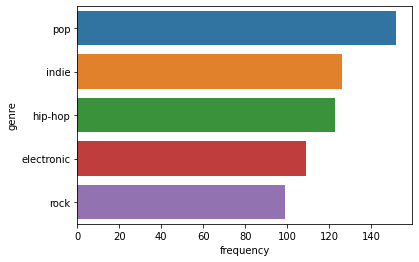

In [112]:
import seaborn as sns
sns.barplot(x=df.frequency[:5], y = df.index[:5]);

In [61]:
artists.to_csv("top_artists.csv", index=False)